In [6]:
print ("Pregunta 1: Utilice yfinance para extraer datos bursátiles")
print ("Restablezca el índice, guarde y visualice las cinco primeras filas del marco de datos tesla_data utilizando la función head. Suba una captura de pantalla de los resultados y el código del principio de la Pregunta 1 a los resultados de abajo.")

Pregunta 1: Utilice yfinance para extraer datos bursátiles
Restablezca el índice, guarde y visualice las cinco primeras filas del marco de datos tesla_data utilizando la función head. Suba una captura de pantalla de los resultados y el código del principio de la Pregunta 1 a los resultados de abajo.


In [7]:
# Step 1: Install yfinance (only needed once)
!pip install yfinance

# Step 2: Import it
import yfinance as yf

# Step 3: Use it
tesla = yf.Ticker("TSLA")
tesla_share_price_data = tesla.history(period="max")
tesla_share_price_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [8]:
print ("Question 2: Use Webscraping to Extract Tesla Revenue Data")
print ("Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.")

Question 2: Use Webscraping to Extract Tesla Revenue Data
Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.


In [19]:
import requests
import pandas as pd

from bs4 import BeautifulSoup

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data  = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
table = soup.find_all("tbody")[1]

for row in table.find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text

    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

tesla_revenue.tail()



,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [20]:
print ("Question 3: Use yfinance to Extract Stock Data")
print ("Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.")

Question 3: Use yfinance to Extract Stock Data
Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.


In [23]:
gamestop = yf.Ticker("GME")
gamestop_share_price_data = gamestop.history(period="max")
gamestop_share_price_data.reset_index(inplace=True)
gamestop_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [24]:
print ("Question 4: Use Webscraping to Extract GME Revenue Data")
print ("Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.")

Question 4: Use Webscraping to Extract GME Revenue Data
Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.


In [27]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text
soup2 = BeautifulSoup(html_data_2, 'html.parser')
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
table = soup2.find_all("tbody")[1]

for row in table.find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text

    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"",regex=True)
gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [28]:
print ("Question 5: Plot Tesla Stock Graph")
print ("Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.")

Question 5: Plot Tesla Stock Graph
Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 177.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 122.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 160.0 MB/s eta 0:00:00


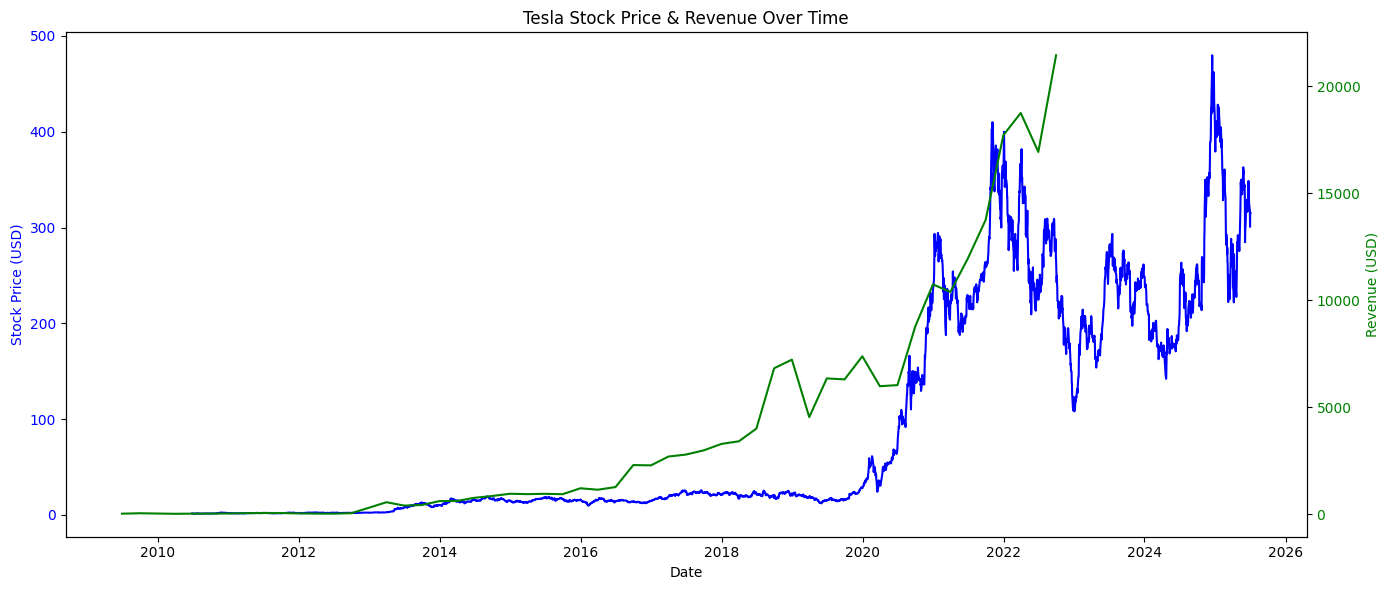

In [32]:
!pip install matplotlib

import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot stock price
    ax1.plot(stock_data.index, stock_data['Close'], color='blue', label='Stock Price')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price (USD)", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Plot revenue on second y-axis
    ax2 = ax1.twinx()
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    revenue_data['Revenue'] = pd.to_numeric(revenue_data['Revenue'], errors='coerce')
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='green', label='Revenue')
    ax2.set_ylabel("Revenue (USD)", color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Add title
    plt.title(f"{stock} Stock Price & Revenue Over Time")
    fig.tight_layout()
    plt.show()
make_graph(tesla_share_price_data, tesla_revenue, "Tesla")

In [33]:
print ("Question 6: Plot GameStop Stock Graph")
print ("Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.")

Question 6: Plot GameStop Stock Graph
Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.


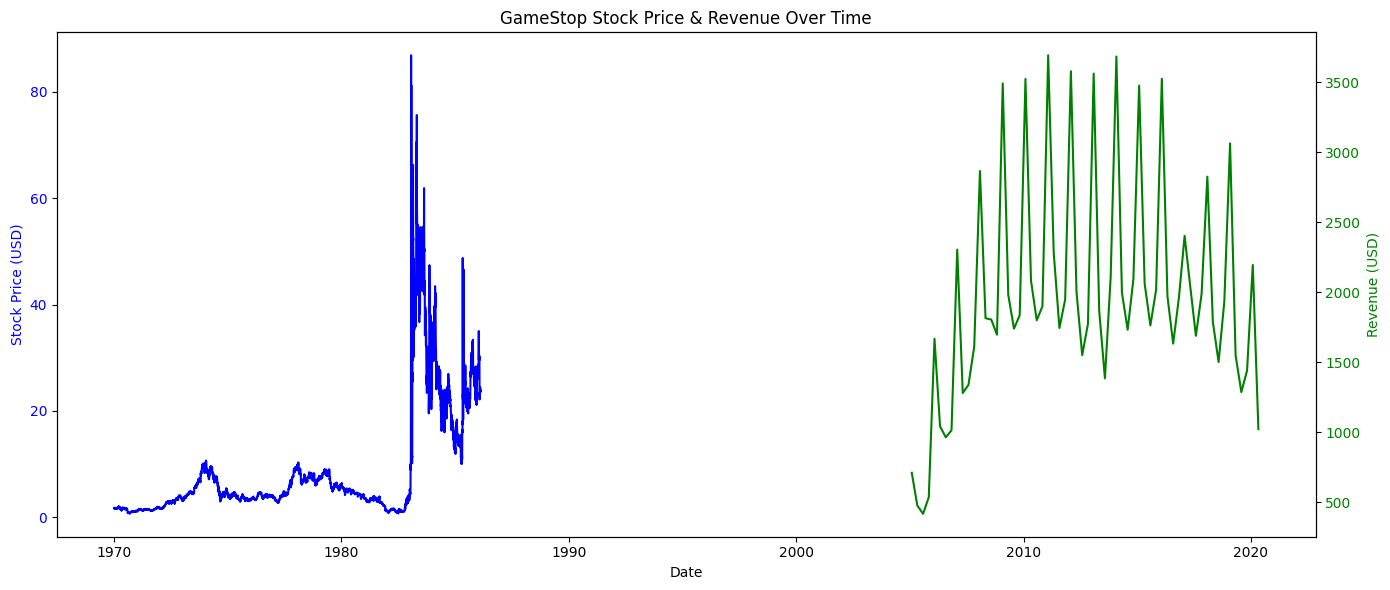

In [34]:
make_graph(gamestop_share_price_data, gme_revenue, 'GameStop')